# Prédiction du Covid 19<br>

## 1. Contexte :

La prédiction du covid19 est importante pour atténuer sa propagation. Actuellement, la
plupart des méthodes de diagnostic impliquent l’échantillonnage des fluides nasaux, de la
salive ou du sang suivi de tests à base d'acide nucléique ou le dépistage sérologique sanguin
des infections passées. Les diagnostics basés sur les acides nucléiques peuvent nécessiter des
échantillons prélevés plusieurs jours après l'exposition pour une détection positive sans
ambiguïté. De plus, ils ne peuvent pas être mis en œuvre systématiquement à faible coût et
sont limités par les pénuries émergentes de réactifs clés. 

L’une des solutions pour palier à ce problème est l’utilisation de <b>l’Analyse Prédictive</b>.
<br>
L’objectif de ce devoir étant de développer <b>un modèle de prédiction du Covid 19 à partir de 4 paramètres : L’âge, le sexe, La saturation en oxygène SPO2 et la Température</b>. 

## 2. Méthodologie :

Le but ici est la classification, c'est-à-dire: étant donné un ensemble de données d'entrée avec des labels de classe (Covid ou non Covid), Vous devez développer un modèle pour prédire avec précision la classe d’une nouvelle donnée d'entrée inconnue.

### 2.1 Dataset :

Le dataset à utiliser est accessible via la plateforme [GitHub](https://github.com/ieee8023/covid-chestxray-dataset/blob/master/metadata.csv).

### 2.2 Analyse de données :

#### A- Importer le dataset dans votre environnement Jupiter Notebook.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
%matplotlib inline
figsize(14, 7)
sns.set(style='ticks')
pd.options.mode.chained_assignment = None

In [6]:
df = pd.read_csv("dataset.csv")
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


#### B- Générer un nouveau dataset en ne retenant que les variables d’intérêts (âge, sexe, saturation en oxygène SPO2 et Température. Afficher un descriptif de ce nouveau dataset. 

In [7]:
df.columns

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')

In [8]:
new_df = df[['age', 'sex', 'pO2_saturation', 'temperature', 'finding']]

#### C- Visualiser un extrait des enregistrements. 

In [9]:
new_df.head()

,age,sex,pO2_saturation,temperature,finding
0,65.0,M,NaN,NaN,Pneumonia/Viral/COVID-19
1,65.0,M,NaN,NaN,Pneumonia/Viral/COVID-19
2,65.0,M,NaN,NaN,Pneumonia/Viral/COVID-19
3,65.0,M,NaN,NaN,Pneumonia/Viral/COVID-19
4,52.0,F,NaN,NaN,Pneumonia/Viral/COVID-19


#### D- Procéder au nettoyage des données. Enlever les data manquantes. 

dans cette étape je supprimer tous les lignes qui a plus de 3 valeurs null.

In [10]:
len(new_df)

950

In [11]:
threshold = 0.75
data_1 = new_df.loc[new_df.isnull().mean(axis=1) < threshold]

In [12]:
len(data_1)

893

##### Pour la colonne `âge`

In [13]:
data_1["age"].isnull().sum()

180

In [14]:
data_1["age"] = data_1["age"].fillna(data_1["age"].median())

In [15]:
data_1["age"].max()

94.0

gestion des valeurs aberrantes

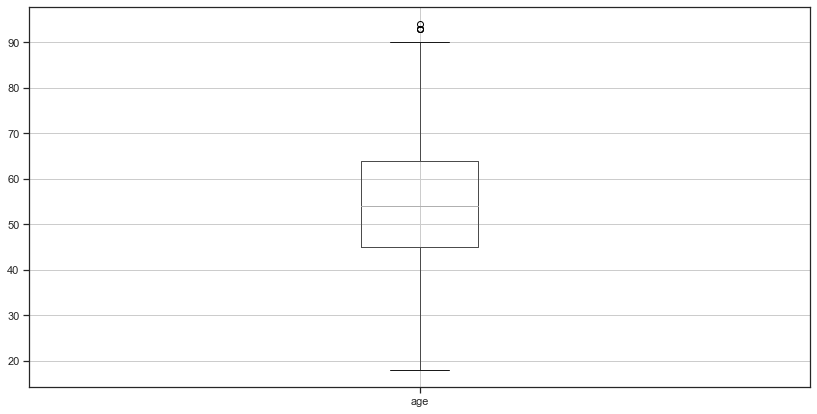

In [16]:
data_1.boxplot(column=["age"])
pass

In [17]:
data_1['age'] = pd.cut(data_1['age'],
                       bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                       labels=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [18]:
data_1['age'].astype(int).dtype

dtype('int32')

##### Pour la colonne `sex`

In [29]:
data_2 = data_1.copy(deep=True)

In [30]:
data_2["sex"].isnull().sum()

23

In [31]:
data_2['sex'] = data_2['sex'].fillna(data_2['sex'].value_counts().index[0])

In [32]:
data_2

,age,sex,pO2_saturation,temperature,finding
0,70,M,NaN,NaN,Pneumonia/Viral/COVID-19
1,70,M,NaN,NaN,Pneumonia/Viral/COVID-19
2,70,M,NaN,NaN,Pneumonia/Viral/COVID-19
3,70,M,NaN,NaN,Pneumonia/Viral/COVID-19
4,60,F,NaN,NaN,Pneumonia/Viral/COVID-19
...,...,...,...,...,...
945,40,F,NaN,NaN,Pneumonia
946,40,F,NaN,NaN,Pneumonia
947,30,M,NaN,NaN,Pneumonia
948,50,M,NaN,NaN,Pneumonia


##### Pour la colonne `pO2_saturation`

In [33]:
data_3 = data_2.copy(deep=True)

In [34]:
data_3["pO2_saturation"].isnull().sum()

774

In [35]:
data_3["pO2_saturation"] = data_3["pO2_saturation"].fillna(data_3["pO2_saturation"].median())

gestion des valeurs aberrantes

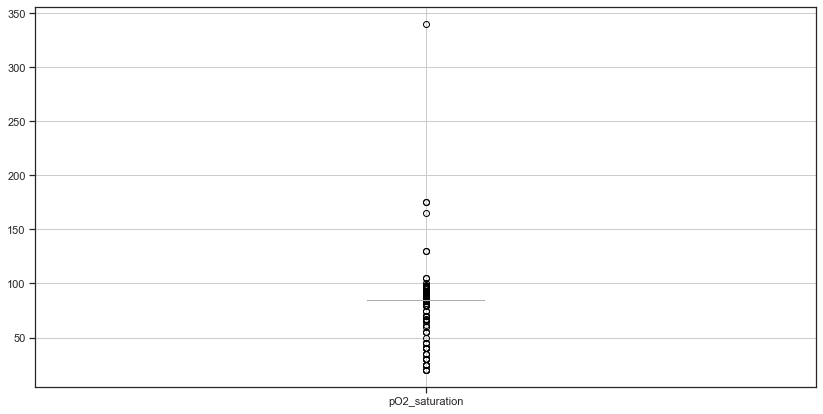

In [36]:
data_3.boxplot(column=["pO2_saturation"])
pass

In [37]:
threshold = 120
data_3.loc[data_3["pO2_saturation"] > threshold, "pO2_saturation"] = threshold

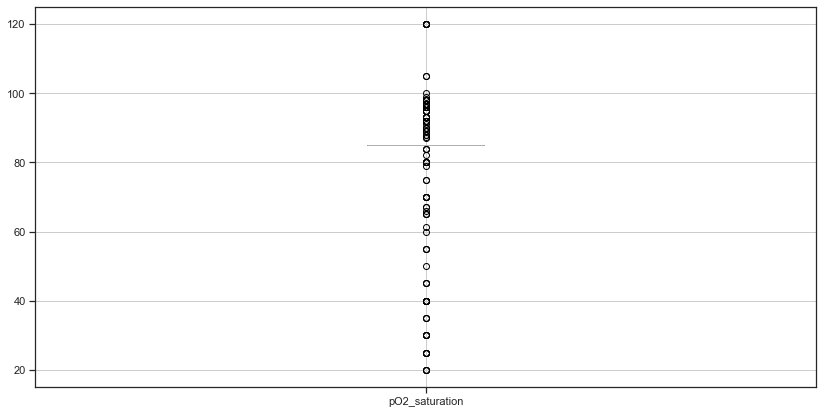

In [38]:
data_3.boxplot(column=["pO2_saturation"])
pass

##### Pour la colonne `temperature`

In [39]:
data_4 = data_3.copy(deep=True)

In [40]:
data_4["temperature"].isnull().sum()

815

In [41]:
data_4["temperature"] = data_4["temperature"].fillna(data_4["temperature"].median())

gestion des valeurs aberrantes

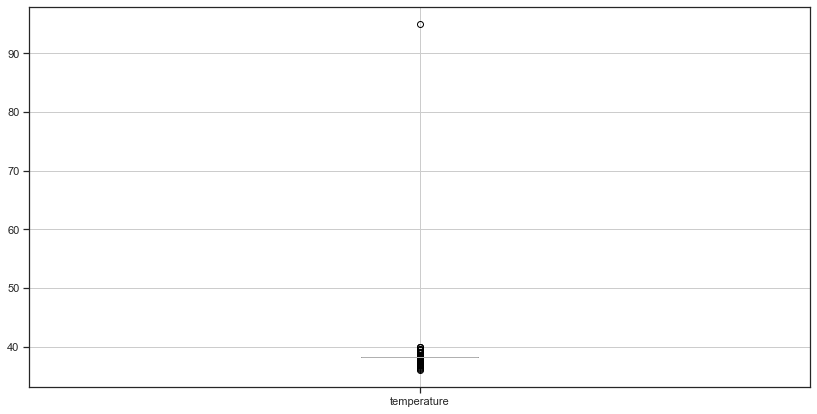

In [42]:
data_4.boxplot(column=["temperature"])
pass

In [43]:
threshold = 40
data_4.loc[data_3["temperature"] > threshold, "temperature"] = threshold

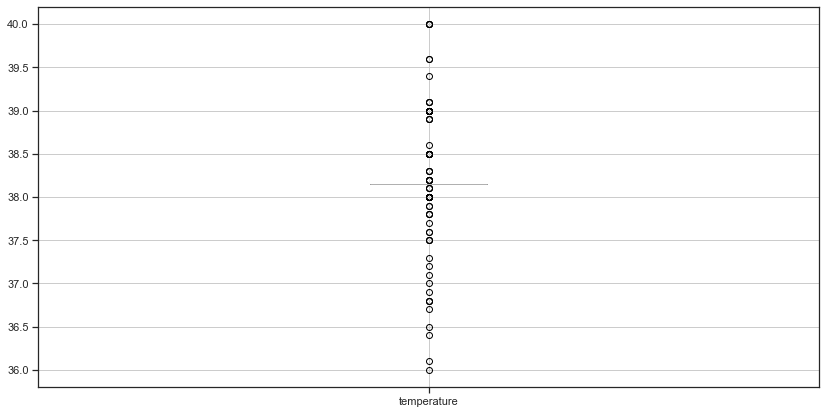

In [44]:
data_4.boxplot(column=["temperature"])
pass

##### Pour la colonne `finding`

In [45]:
data_5 = data_4.copy(deep=True)

In [46]:
data_5 = data_5.loc[~data_5["finding"].str.contains("Unknown")]

In [47]:
data_5["finding"].value_counts()

Pneumonia/Viral/COVID-19                   542
todo                                        82
Pneumonia                                   80
Pneumonia/Fungal/Pneumocystis               27
Pneumonia/Bacterial/Streptococcus           22
No Finding                                  22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Bacterial/Legionella              10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Viral/Herpes                       3
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fungal/Aspergillosis               2
Pneumonia/Bac

In [48]:
def split_finding(x):
    if "COVID-19" in x or "todo" in x:
        return 1
    return 0

In [49]:
data_5["covid-19"] = data_5["finding"].apply(lambda x: split_finding(x))

In [50]:
data_5 = data_5.drop(["finding"], axis=1)

In [51]:
data_5

,age,sex,pO2_saturation,temperature,covid-19
0,70,M,85.0,38.15,1
1,70,M,85.0,38.15,1
2,70,M,85.0,38.15,1
3,70,M,85.0,38.15,1
4,60,F,85.0,38.15,1
...,...,...,...,...,...
945,40,F,85.0,38.15,0
946,40,F,85.0,38.15,0
947,30,M,85.0,38.15,0
948,50,M,85.0,38.15,0


La correction des types des donnée

In [52]:
data_5.dtypes

age               category
sex                 object
pO2_saturation     float64
temperature        float64
covid-19             int64
dtype: object

In [53]:
data_5.astype({'age' : 'int32',
               'sex' : 'object',
               'pO2_saturation' : 'float64',
               'temperature': 'float64',
               'covid-19' : 'object'
              }).dtypes

age                 int32
sex                object
pO2_saturation    float64
temperature       float64
covid-19           object
dtype: object

#### E- Afficher un tableau décrivant le dataset après nettoyage. 

In [54]:
data = data_5.copy(deep=True)
data

,age,sex,pO2_saturation,temperature,covid-19
0,70,M,85.0,38.15,1
1,70,M,85.0,38.15,1
2,70,M,85.0,38.15,1
3,70,M,85.0,38.15,1
4,60,F,85.0,38.15,1
...,...,...,...,...,...
945,40,F,85.0,38.15,0
946,40,F,85.0,38.15,0
947,30,M,85.0,38.15,0
948,50,M,85.0,38.15,0


#### F- Générer 4 plots pour visualiser convenablement chacune des variables dans ce nouveau dataset. 

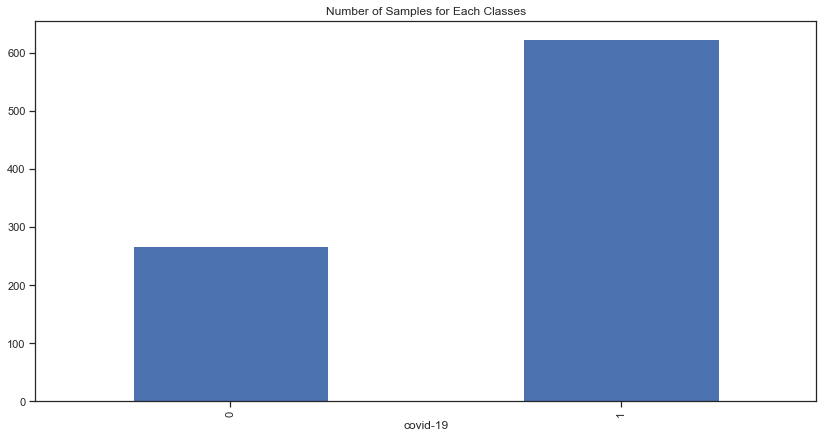

In [55]:
data.groupby(['covid-19']).size().plot.bar(title="Number of Samples for Each Classes")
pass

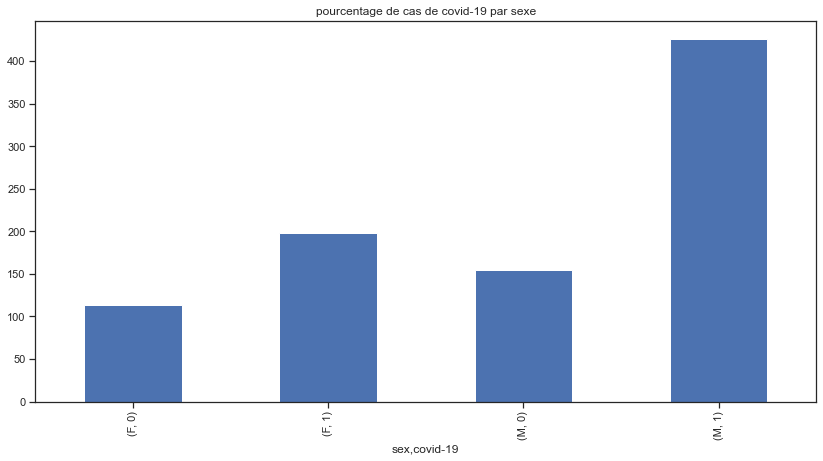

In [56]:
data.groupby(['sex', 'covid-19']).size().plot.bar(title="pourcentage de cas de covid-19 par sexe")
pass

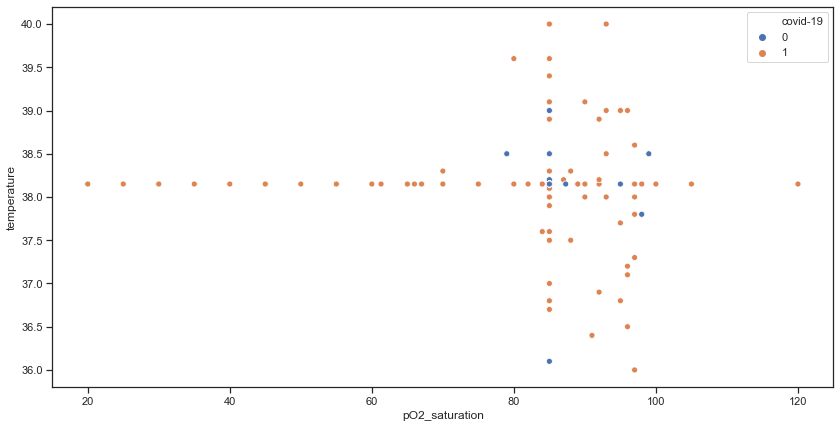

In [57]:
sns.scatterplot(data=data[["pO2_saturation", "temperature", "covid-19"]], x="pO2_saturation", y="temperature", hue="covid-19")
pass

In [58]:
data.groupby(["covid-19", "sex"]).size()

covid-19  sex
0         F      113
          M      155
1         F      198
          M      426
dtype: int64

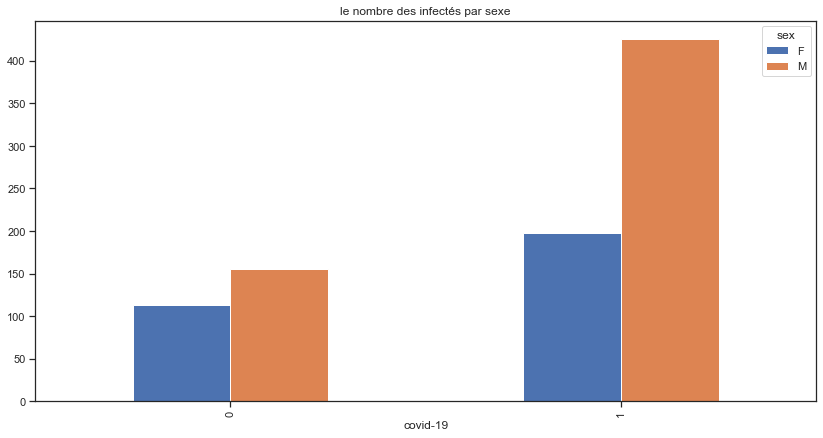

In [59]:
data.groupby(["covid-19", "sex"]).size().unstack().plot.bar(title="le nombre des infectés par sexe")
pass

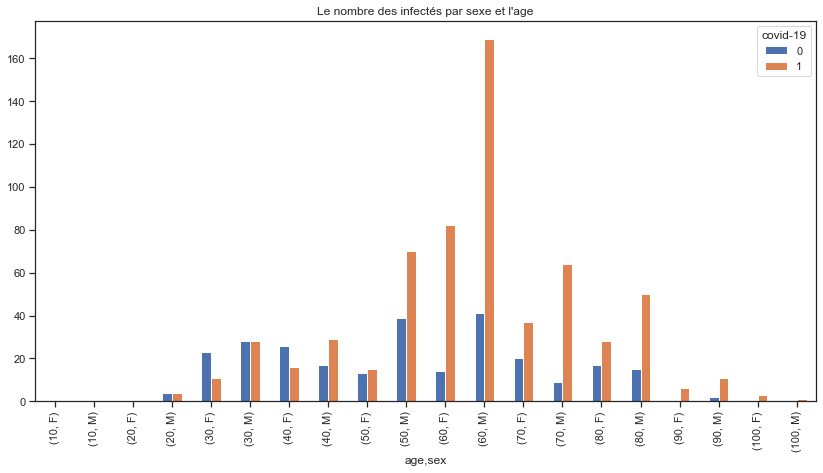

In [60]:
data.groupby(["age", "sex", "covid-19"]).size().unstack().plot.bar(title="Le nombre des infectés par sexe et l'age")
pass

#### G- Construire 5 modèles de prédictions du covid 19

In [61]:
def gender_bin(x):
    if x == "M":
        return 1
    elif x == "F":
        return 0

data["sex"] = data["sex"].apply(lambda x: gender_bin(x))

data.to_csv("dataset_cleaned.csv", index=False)

In [62]:
data

,age,sex,pO2_saturation,temperature,covid-19
0,70,1,85.0,38.15,1
1,70,1,85.0,38.15,1
2,70,1,85.0,38.15,1
3,70,1,85.0,38.15,1
4,60,0,85.0,38.15,1
...,...,...,...,...,...
945,40,0,85.0,38.15,0
946,40,0,85.0,38.15,0
947,30,1,85.0,38.15,0
948,50,1,85.0,38.15,0


In [63]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [100]:
X

array([[70.  ,  1.  , 85.  , 38.15],
       [70.  ,  1.  , 85.  , 38.15],
       [70.  ,  1.  , 85.  , 38.15],
       ...,
       [30.  ,  1.  , 85.  , 38.15],
       [50.  ,  1.  , 85.  , 38.15],
       [50.  ,  1.  , 85.  , 38.15]])

In [65]:
y[ : 10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

Train Test Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Feature Scaling

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### 1- K-Nearest Neighbors 

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors=46)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [97]:
print(confusion_matrix(y_test, y_pred))

[[ 17  31]
 [ 11 120]]


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.35      0.45        48
           1       0.79      0.92      0.85       131

   micro avg       0.77      0.77      0.77       179
   macro avg       0.70      0.64      0.65       179
weighted avg       0.74      0.77      0.74       179



L'optimum K est 46


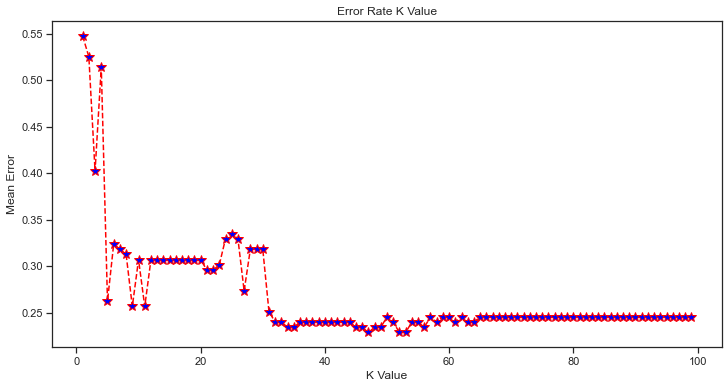

In [95]:
error = []

# Calculating error for K values between 1 and 100
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

print("L'optimum K est {}".format(error.index(min(error))))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='*', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
pass

##### 2- Support Vector Machines